In [1]:
import os
import numpy as np
import pandas as pd
from dfply import *
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# 환경설정
plt.style.use('classic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
if not any([s=='result' for s in os.listdir()]): os.mkdir('result')

In [3]:
# 데이터 불러오기
oil_price_du = pd.read_excel('result/oil_price.xlsx', sheet_name='두바이유').drop('코드', axis=1)
target = pd.read_csv('data/target_v1.csv')
target['date'] = pd.to_datetime(target['date'])
target = target[['date', 'smp_mean']]

In [4]:
# 데이터 병합
oil_price = target.merge(oil_price_du, left_on='date', right_on='날짜', how='left').drop('날짜', axis=1)
oil_price.columns = ['date', 'smp_wgt_mean', 'oil_price']
oil_price = oil_price[['date', 'oil_price']]
oil_price.head()

,date,oil_price
0,2018-02-01,66.73
1,2018-02-02,65.74
2,2018-02-03,NaN
3,2018-02-04,NaN
4,2018-02-05,64.99


In [7]:
# Interpolation
oil_price['ffill'] = oil_price['oil_price'].ffill()
oil_price['bfill'] = oil_price['oil_price'].bfill()
oil_price['interpolate'] = oil_price['oil_price'].interpolate()

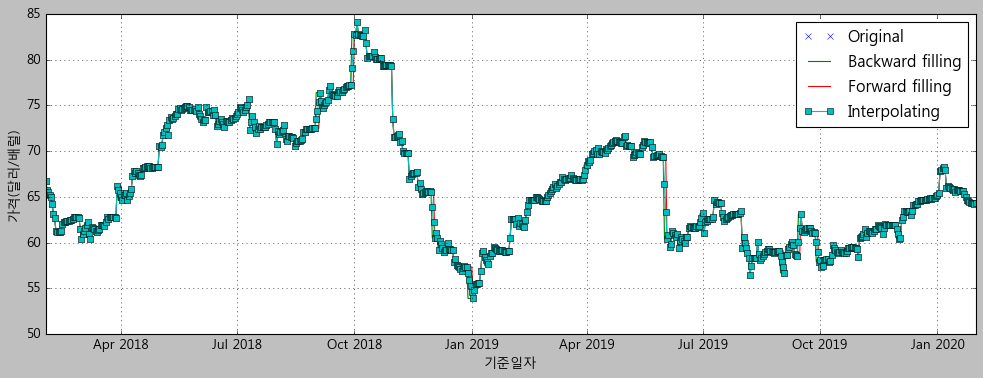

In [8]:
# 시각화
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(oil_price['date'], oil_price['oil_price'], 'x', label='Original')
ax.plot(oil_price['date'], oil_price['bfill'], label='Backward filling')
ax.plot(oil_price['date'], oil_price['ffill'], label='Forward filling')
ax.plot(oil_price['date'], oil_price['interpolate'], '-s', label='Interpolating')

ax.grid()
ax.set_ylabel('가격(달러/배럴)')
ax.set_xlabel('기준일자')
ax.legend()

plt.show()

In [9]:
# 출력
now = datetime.now().strftime('%Y%m%d%H%M%S')
with pd.ExcelWriter('result/ts_filling_{}.xlsx'.format(now), 'xlsxwriter') as writer:
    oil_price.to_excel(writer, index=False)